# **DECISION TREE**

## **Objective:**

## The objective of this assignment is to apply Decision Tree Classification to a given dataset, analyse the performance of the model, and interpret the results.

## **Tasks:**

## **1. Data Preparation:**
Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv('/content/heart_disease_1.csv')

## **2. Exploratory Data Analysis (EDA):**

Perform exploratory data analysis to understand the structure of the dataset.

In [ ]:
# Display the first few rows of the dataset
print(df.head())

   age   sex               cp  trestbps  chol  fbs         restecg  thalch  \
0   63  Male   typical angina       145   233    1  lv hypertrophy     150   
1   41  Male  atypical angina       135   203    0          normal     132   
2   57  Male     asymptomatic       140   192    0          normal     148   
3   52  Male   typical angina       118   186    0  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201    0          normal     126   

   exang  oldpeak        slope          thal  num  
0  FALSE      2.3  downsloping  fixed defect    0  
1  FALSE      0.0         flat  fixed defect    0  
2  FALSE      0.4         flat  fixed defect    0  
3  FALSE      0.0         flat  fixed defect    0  
4   TRUE      1.5         flat  fixed defect    0  


In [ ]:
# Summary statistics
print(df.describe())

              age    trestbps        chol         fbs      thalch     oldpeak  \
count  908.000000  908.000000  908.000000  908.000000  908.000000  846.000000   
mean    53.791850  133.430617  201.484581    0.203744  135.957048    0.891253   
std      9.158031   20.401608  112.097949    0.403003   26.804929    1.093875   
min     29.000000    0.000000    0.000000    0.000000   60.000000   -2.600000   
25%     47.750000  120.000000  176.750000    0.000000  118.000000    0.000000   
50%     54.000000  130.000000  224.000000    0.000000  138.000000    0.500000   
75%     60.000000  144.000000  270.000000    0.000000  156.000000    1.500000   
max     77.000000  200.000000  603.000000    1.000000  202.000000    6.200000   

              num  
count  908.000000  
mean     1.008811  
std      1.144436  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000  


Check for missing values, outliers, and inconsistencies in the data.

In [ ]:
# Check for missing values
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


### Visualize the distribution of numerical features

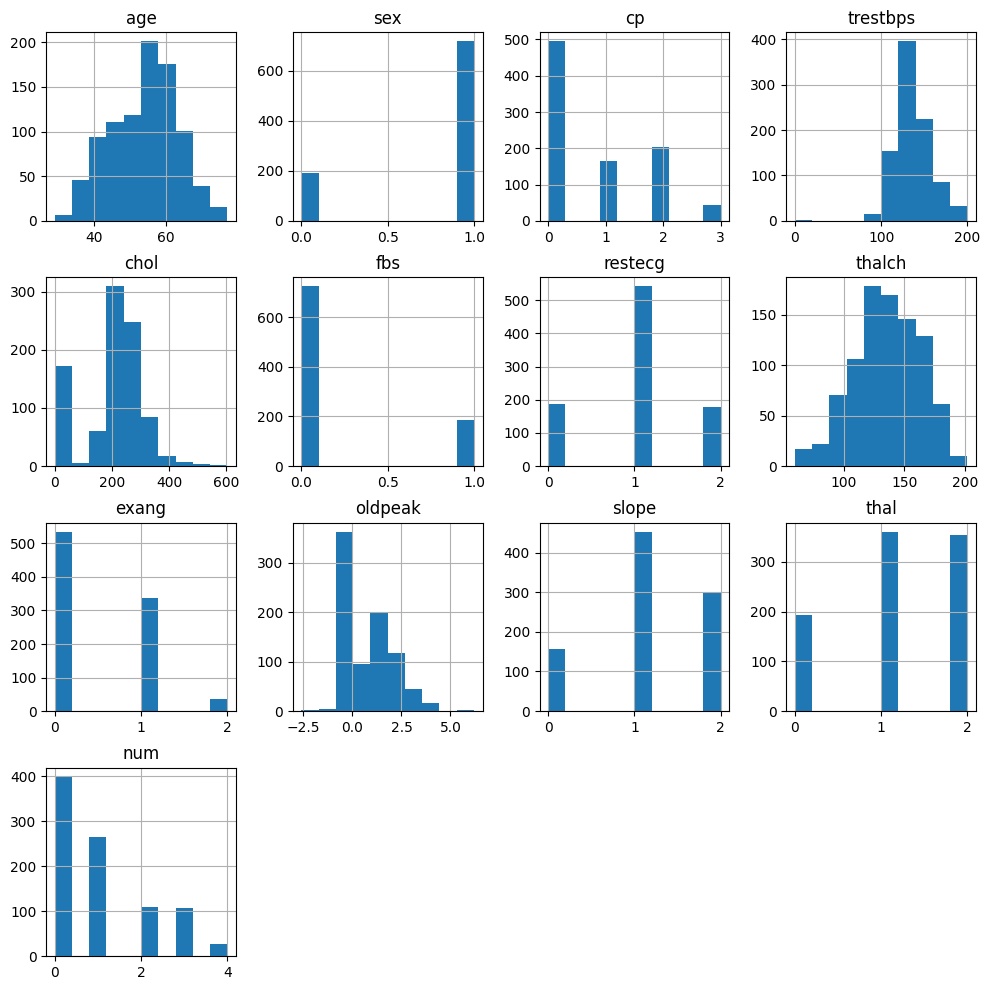

In [ ]:
df.hist(figsize=(12, 12))
plt.show()

### Box plots to visualize outliers

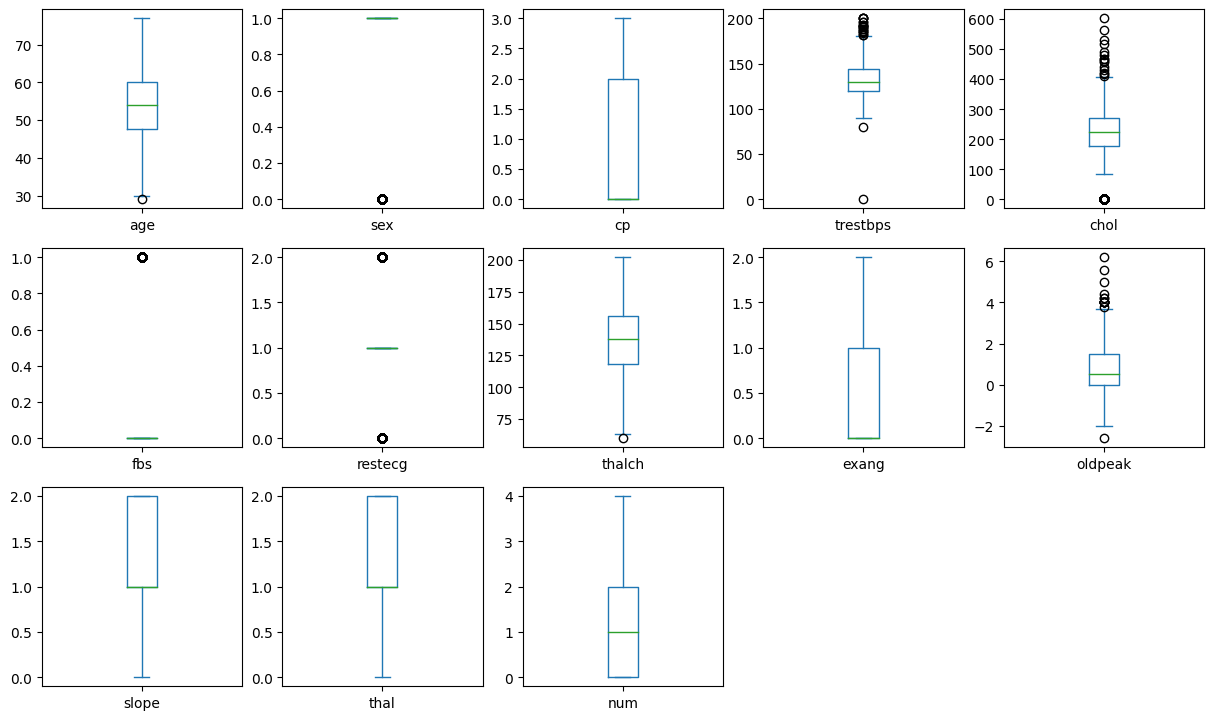

In [ ]:
df.plot(kind='box', subplots=True, layout=(5, 5), figsize=(15, 15), sharex=False, sharey=False)
plt.show()

### Correlation matrix

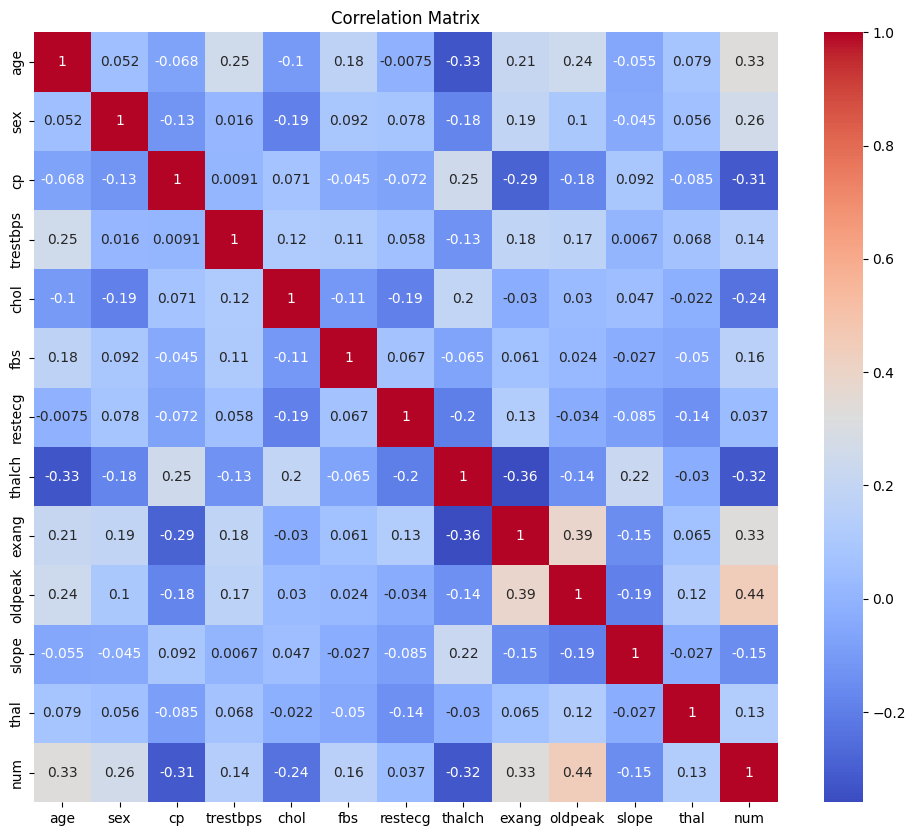

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **3. Feature Engineering:**

In [ ]:
# Encode categorical variables using Label Encoding or One-Hot Encoding
categorical_features = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

In [ ]:
for col in categorical_features:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
# Handle missing values if any (assuming mean imputation for simplicity)
df.fillna(df.mean(), inplace=True)

In [ ]:
# Scale numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## **4.Decision Tree Regression**

In [ ]:
# Split the dataset into training and testing sets
X = df.drop('num', axis=1)
y = df['num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)
X_train.shape, X_test.shape

((272, 12), (636, 12))

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Implement a DecisionTreeRegressor (for continuous targets)
dt = DecisionTreeRegressor(max_depth=3)

In [ ]:
# Fit the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
# Predict on the testing set
y_pred = dt_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.33
Mean Absolute Error: 0.20
R^2 Score: 0.67


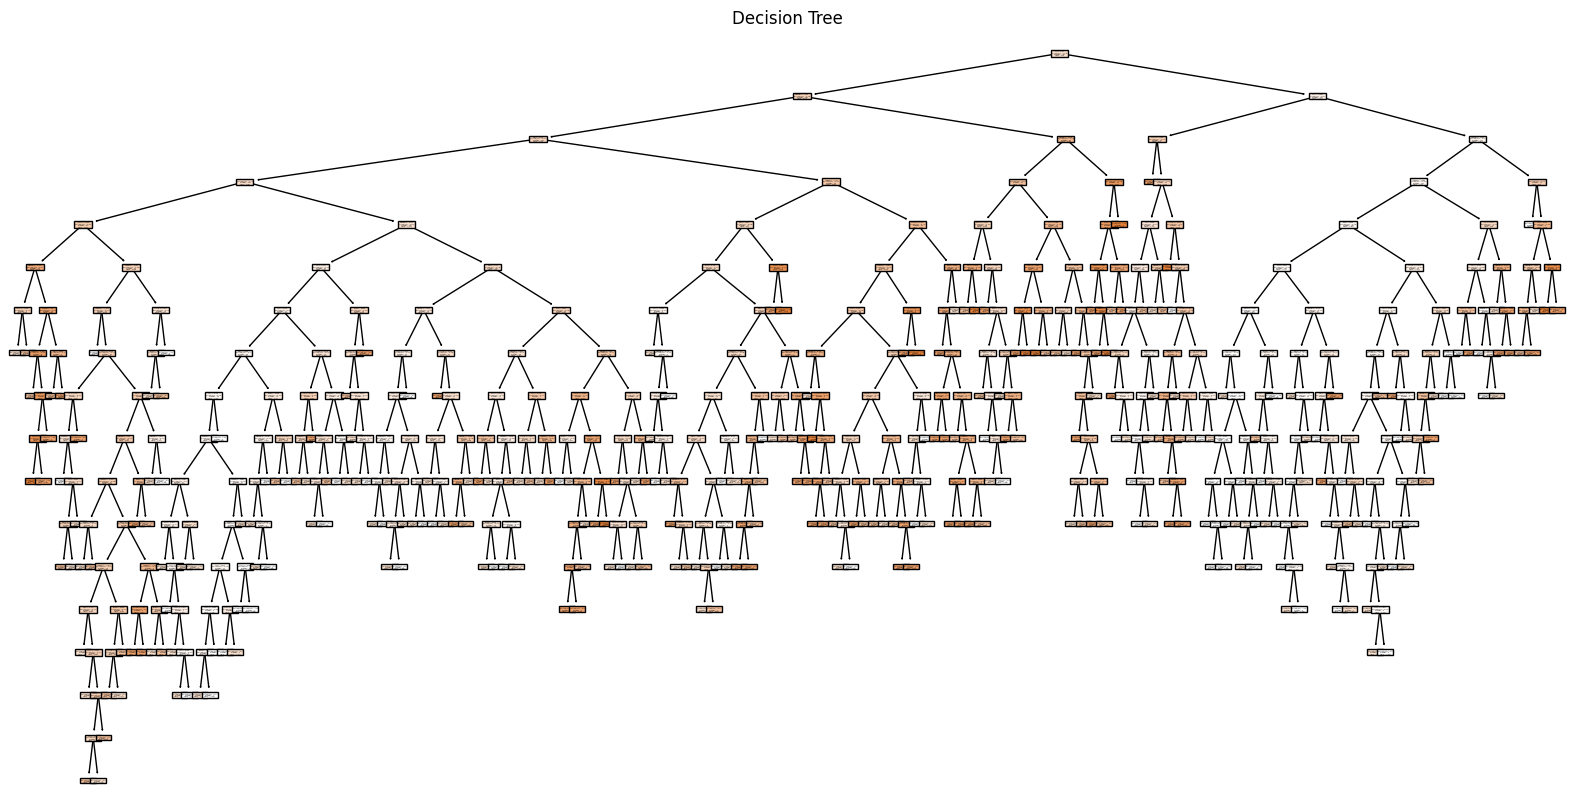

In [ ]:
# Visualize the decision tree structure
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns)
plt.title('Decision Tree')
plt.show()

## **5.Hyperparameter Tuning**

### Perform hyperparameter tuning to optimize the Decision Tree model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [ ]:
# Train the best model
best_dt_regressor = grid_search.best_estimator_
best_dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=10,
                      random_state=42)

In [ ]:
# Predict on the testing set with the best model
y_pred_best = best_dt_regressor.predict(X_test)

In [ ]:
# Evaluate the best model's performance
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

In [ ]:
print(f'Best Model Mean Squared Error: {mse_best:.2f}')
print(f'Best Model Mean Absolute Error: {mae_best:.2f}')
print(f'Best Model R^2 Score: {r2_best:.2f}')

Best Model Mean Squared Error: 0.80
Best Model Mean Absolute Error: 0.63
Best Model R^2 Score: 0.20


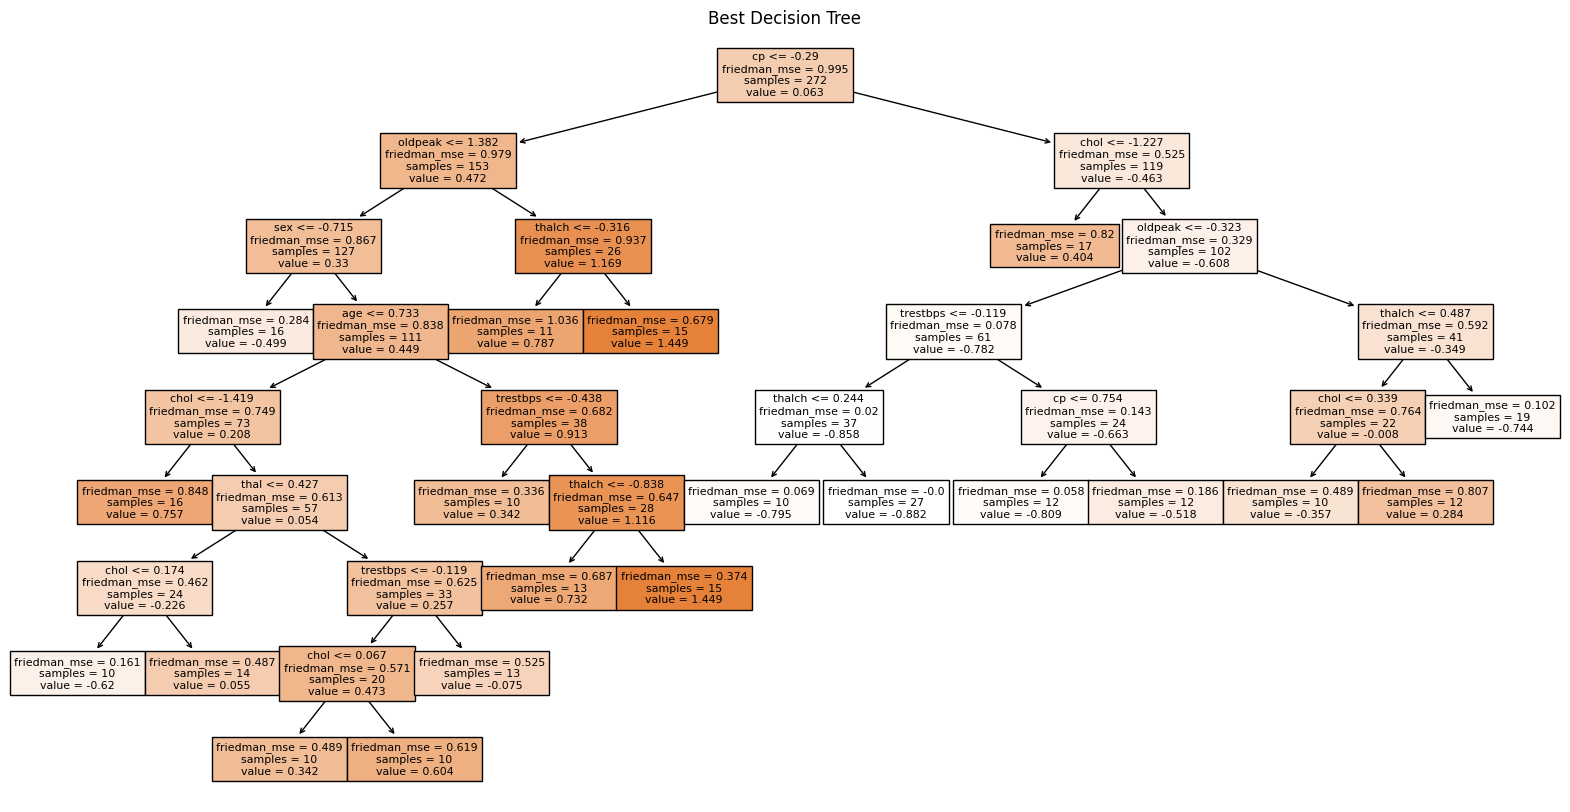

In [ ]:
# Visualize the best decision tree structure
plt.figure(figsize=(20, 10))
plot_tree(best_dt_regressor, filled=True, feature_names=X.columns)
plt.title('Best Decision Tree')
plt.show()

# **Interview Questions**

## 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

*  ##  Max Depth
## **This hyperparameter sets the maximum number of levels or layers in the decision tree.**

## Effect on Performance:

**Shallow Trees: A smaller depth can prevent the model from being too complex, reducing the risk of overfitting (learning noise from the training data).**

**Deep Trees: A larger depth allows the model to learn more detailed patterns but increases the risk of overfitting.**




*  ## Min Samples Split
## **This defines the minimum number of samples (data points) required to split an internal node..**

## Effect on Performance:

**Higher Values: If set too high, the tree might not grow enough and may underfit (not learn enough patterns)..**

**Lower Values: If set too low, the tree can become very complex and overfit the training data.**




*  ## Min Samples Leaf
## **This specifies the minimum number of samples that must be present in a leaf node (the end points of the tree)..**

## Effect on Performance:

**Higher Values: Increases the number of samples required at each leaf, which can lead to a simpler model and reduce overfitting.**

**Lower Values: Allows the model to create leaf nodes with fewer samples, making it more complex and potentially leading to overfitting.**




*  ## Max Features
## **This hyperparameter controls the maximum number of features (input variables) that the model can consider when making a split at each node.**

## Effect on Performance:

**Smaller Values: Reducing the number of features can lead to simpler trees and help combat overfitting.**

**Larger Values: Allowing more features can improve the model's ability to learn complex patterns but may increase the risk of overfitting.**




*  ## Criterion
## **This defines the function used to measure the quality of a split. Common criteria include "gini impurity" and "entropy."**

## Effect on Performance:

**Different criteria can lead to different tree structures. Choosing the right criterion can improve how well the model separates the classes.**




*  ## Class Weight
## **This parameter helps balance the importance of classes, especially in cases of imbalanced datasets (where one class has significantly more samples than the other).**

## Effect on Performance:

**Adjusting Class Weights: It allows the model to pay more attention to the minority class, improving performance on unbalanced datasets.**




## 2. What is the difference between the Label encoding and One-hot encoding?

## **1. Label Encoding**

## Label encoding converts each category (or label) in your data into a unique number.

## **2. One-Hot Encoding**

## One-hot encoding creates a new binary column for each category and uses 0s and 1s to indicate the presence of each category.

## **Key Differences**

*  ## Label Encoding:

### Simpler and uses fewer columns.

### Can introduce a problem for some models if they mistakenly think that higher numbers mean a higher value (though this is not an issue for decision trees).

### Best for categorical data that has a natural order (like small, medium, large).

*  ## One-Hot Encoding:

### Creates more columns, which increases the size of your dataset.

### Removes any risk of the model assuming that one category is larger or smaller than another.

### Works well when there is no natural order among the categories.